### **SOLUCIÓN EJERCICIO 1**

In [2]:
import pandas as pd

In [6]:
c_size = 500000
col_list = (['arr_port', 'pax','year','arr_city'])
for gm_chunk in pd.read_csv("~/Data/challenge/bookings.csv",chunksize=c_size,sep = '^',usecols=col_list):
    print(gm_chunk.shape)

(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(500000, 4)
(10, 4)


**EJERCICIO 1** -- El data set tiene 10 millones 10 lineas

### **SOLUCIÓN EJERCICIO 2**

In [14]:
import pandas as pd
import seaborn as sns

In [15]:
top10 = pd.DataFrame()
count = 0
c_size = 500000
col_list = (['arr_port', 'pax','year','arr_city'])

for gm_chunk in pd.read_csv("~/Data/challenge/bookings.csv",chunksize=c_size,sep = '^',usecols=col_list):
   
    # Selecciono el año 2013
    gm_chunk = gm_chunk[gm_chunk['year'] == 2013]
    
    # Compruebo si hay NaN y elimino en caso de haber
    if (gm_chunk.isnull().values.any() == True):
        gm_chunk = gm_chunk.dropna()

    # Compruebo los espacios en 'arr_port' para hacer groupby y elimino en caso de haber
    gm_chunk['arr_port'].str.strip()
    gm_chunk['arr_city'].str.strip()
    
    # Comprobaciones hechas, agrupo con groupby, ordeno con sort_values y muestro con head(10)
    #shorted = gm_chunk.groupby(['arr_port','arr_city'])['pax'].sum().sort_values(ascending=False)
    shorted = gm_chunk.groupby(['arr_port']).sum().sort_values('pax',ascending=False)
    del shorted['year']
    
    # Esto es solo para un chunk del data frame original. A continuación se realiza para el resto de chunks, teniendo 
    # que almacenar el contenido en un nuevo data frame.
    top10 = top10.append(shorted.head(10))
    # De esta forma, en top10 tendremos los 10 mas concurridos pudiendo tener repetidos ya que analizamos por fracciones del data set original

# Finalmente, realizo un nuevo groupby por 'arr_port' en el nuevo data frame generado con el objetivo de anular repetidos
# y mostrar el top10 de todo el conjunto de datos 
sol = top10.groupby(['arr_port'])['pax'].sum().sort_values(ascending=False).reset_index()
sol.head(10)

,arr_port,pax
0,LHR,88809.0
1,MCO,70930.0
2,LAX,70530.0
3,LAS,69630.0
4,JFK,66270.0
5,CDG,64490.0
6,BKK,59460.0
7,SFO,58000.0
8,DXB,55590.0
9,MIA,32070.0


### **SOLUCIÓN EJERCICIO 3**

In [6]:
import pandas as pd
import seaborn as sns
import datetime 

pasada numero  1
pasada numero  2
pasada numero  3
pasada numero  4
pasada numero  5
pasada numero  6
pasada numero  7
pasada numero  8
pasada numero  9
pasada numero  10
pasada numero  11
pasada numero  12
pasada numero  13
pasada numero  14
pasada numero  15
pasada numero  16
pasada numero  17
pasada numero  18
pasada numero  19
pasada numero  20
pasada numero  21
pasada numero  22
pasada numero  23
pasada numero  24
pasada numero  25
pasada numero  26
pasada numero  27
pasada numero  28
pasada numero  29
pasada numero  30
pasada numero  31
pasada numero  32
pasada numero  33
pasada numero  34
pasada numero  35
pasada numero  36
pasada numero  37
pasada numero  38
pasada numero  39
pasada numero  40
pasada numero  41


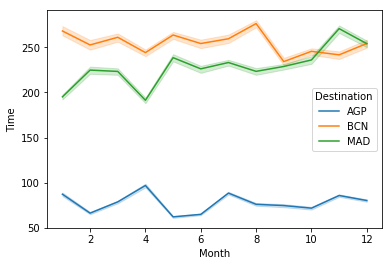

In [13]:
col_list=['Date','Time','Destination']
c_size = 500000
count = 0
chunk_toplot = pd.DataFrame()

for gm_chunk in pd.read_csv('searches.csv.bz2',compression='bz2',chunksize=c_size,sep='^',usecols=col_list):
    
    gm_chunk['Date'] = pd.to_datetime(gm_chunk['Date'],format="%Y-%d-%m",errors='coerce')
    gm_chunk['Month'] = pd.DatetimeIndex(gm_chunk['Date']).month
    #print('month column')
    
    chunk_grouped = gm_chunk.groupby(['Destination','Month'])['Time'].count()
    chunk_grouped = chunk_grouped.reset_index()
    #print('tabla agrupada')
    
    filtered_chunk = chunk_grouped.where(chunk_grouped['Destination'].isin(['MAD','AGP','BCN']) == True).dropna()
    #print('condiciones')
    
    filtered_chunk = filtered_chunk.reset_index(drop=True)
    chunk_toplot = chunk_toplot.append(filtered_chunk)
    #print('tablas a plotear unidas')
    count = count  + 1
    print('pasada numero ',count)
    
        
        
sns.lineplot(data=chunk_toplot, x='Month', y='Time', hue='Destination');